#UCS


In [1]:
import heapq

# Define the graph with weighted edges
graph = {
    'A': [('B', 13), ('C', 7), ('F', 5)],
    'B': [('A', 13), ('H', 3), ('D', 3)],
    'C': [('A', 7), ('D', 5), ('E', 1), ('G', 5)],
    'D': [('B', 3), ('C', 5), ('H', 2)],
    'E': [('C', 1), ('G', 4)],
    'F': [('A', 5), ('G', 6)],
    'G': [('F', 6), ('C', 5), ('E', 4)],
    'H': [('B', 3), ('D', 2)]
}

# UCS function to find the lowest-cost path
def uniform_cost_search(graph, start, goal):
    priority_queue = [(0, start)]  # (cost, node)
    visited = set()
    parent = {start: None}  # To reconstruct the path
    cost_so_far = {start: 0}  # Stores the lowest cost to reach each node

    while priority_queue:
        current_cost, current_node = heapq.heappop(priority_queue)

        # If goal is found, reconstruct the path
        if current_node == goal:
            return reconstruct_path(parent, goal), current_cost

        if current_node in visited:
            continue
        visited.add(current_node)

        # Expand neighbors
        for neighbor, edge_cost in graph.get(current_node, []):
            new_cost = current_cost + edge_cost

            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                parent[neighbor] = current_node
                heapq.heappush(priority_queue, (new_cost, neighbor))

    return None, float('inf')  # Goal not found

# Reconstruct the path from parent dictionary
def reconstruct_path(parent, goal):
    path = []
    while goal is not None:
        path.append(goal)
        goal = parent[goal]
    return path[::-1]  # Reverse to get correct order

# Define Start and Goal nodes
start_node = "A"
goal_node = "H"

# Run UCS and print the shortest cost path
ucs_path, total_cost = uniform_cost_search(graph, start_node, goal_node)

if ucs_path:
    print("\nUCS Shortest Path:", " → ".join(ucs_path))
    print("Total Cost:", total_cost)
else:
    print("\nGoal not found in the graph.")


UCS Shortest Path: A → C → D → H
Total Cost: 14


#UCS with Network X


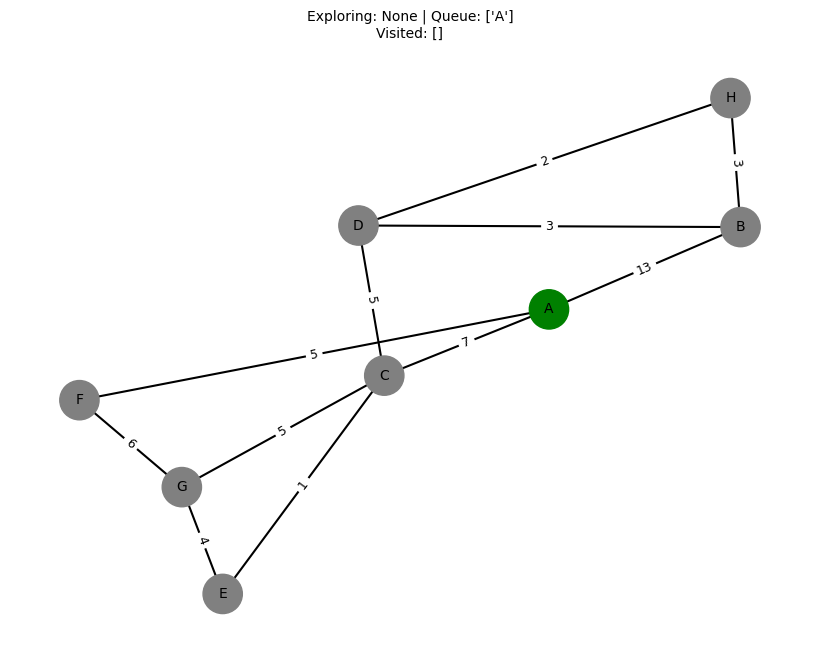

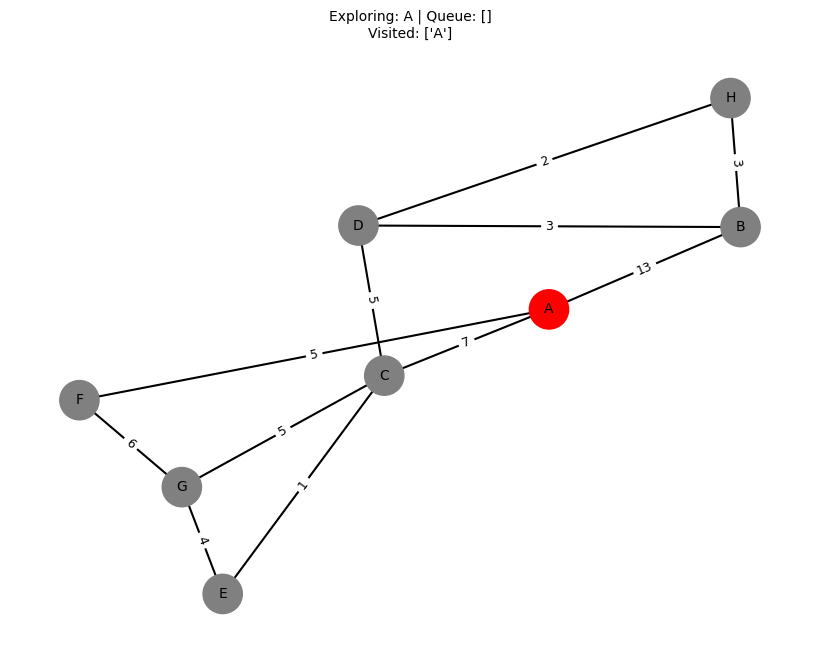

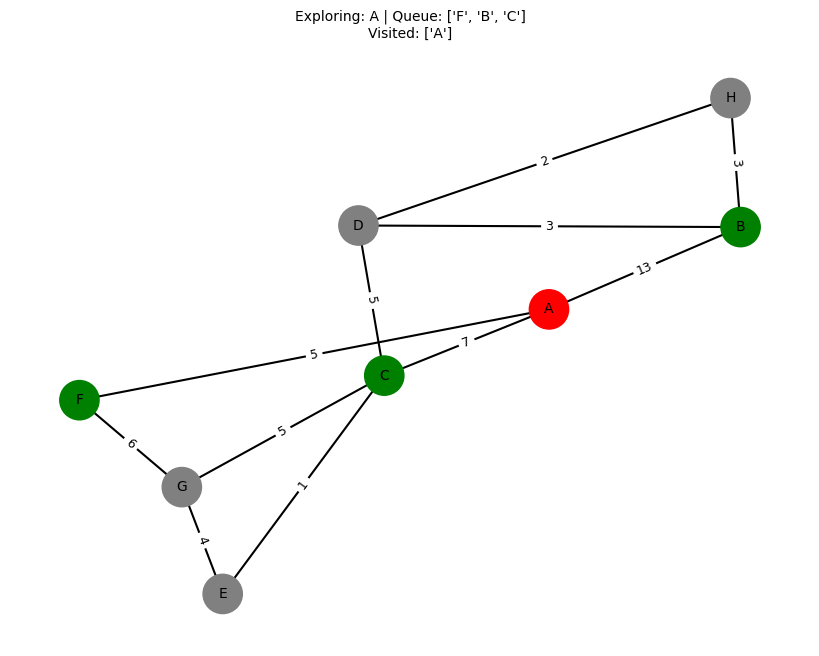

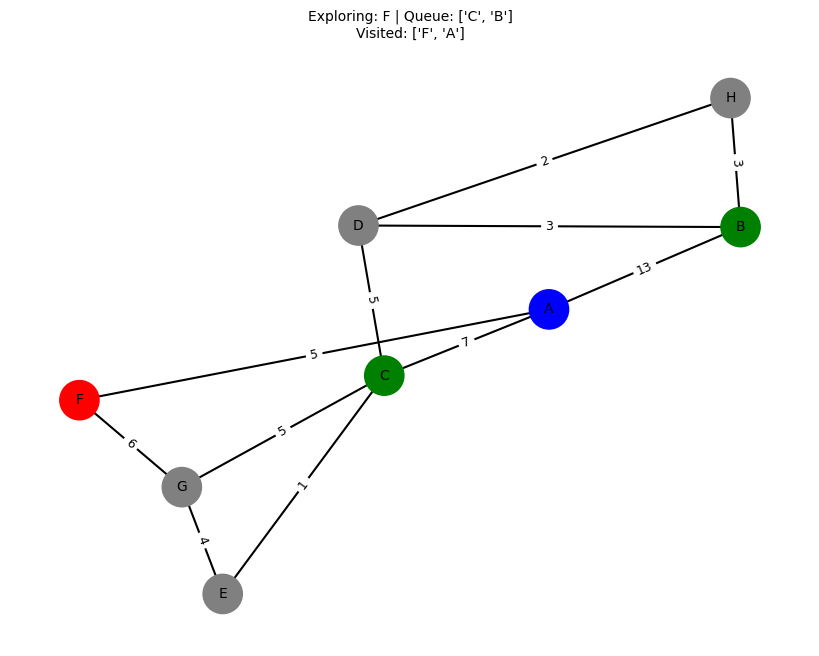

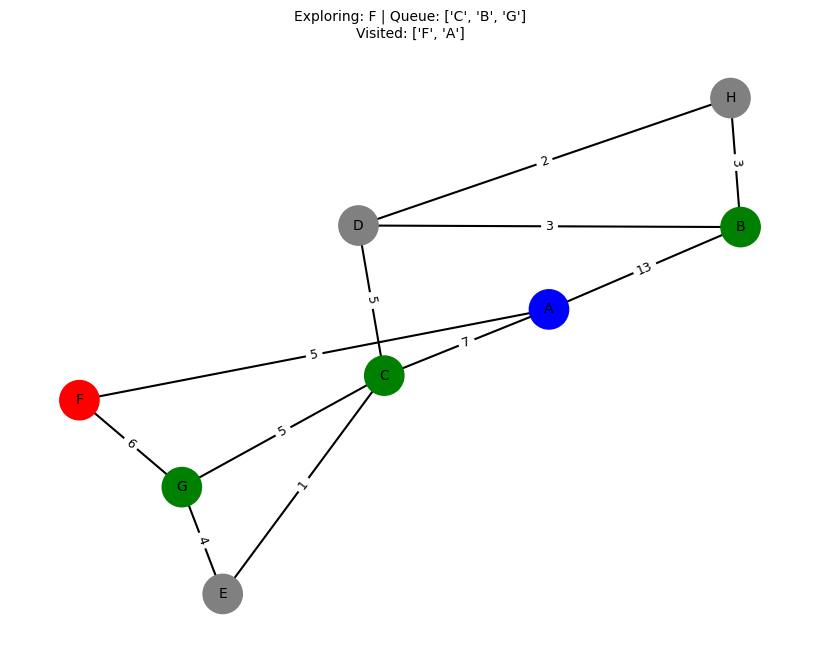

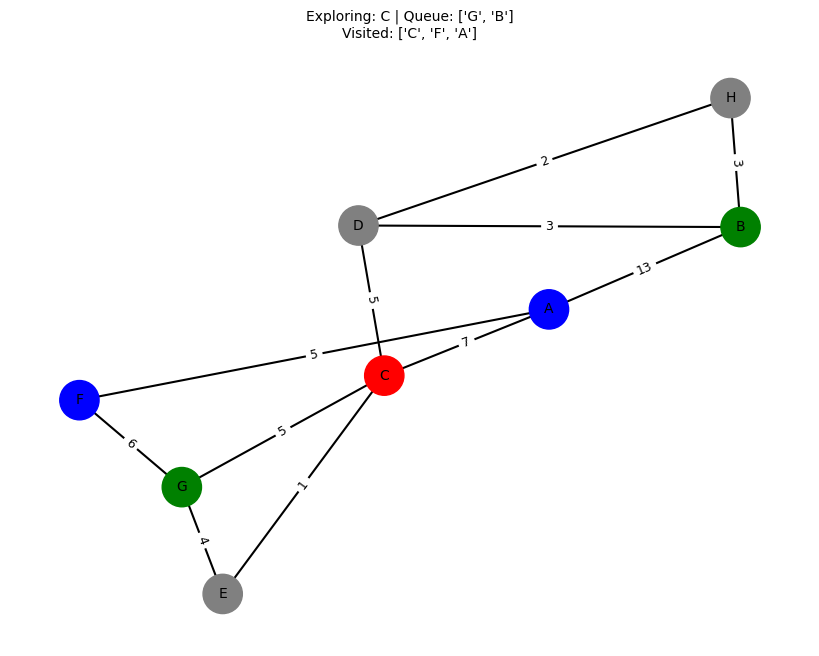

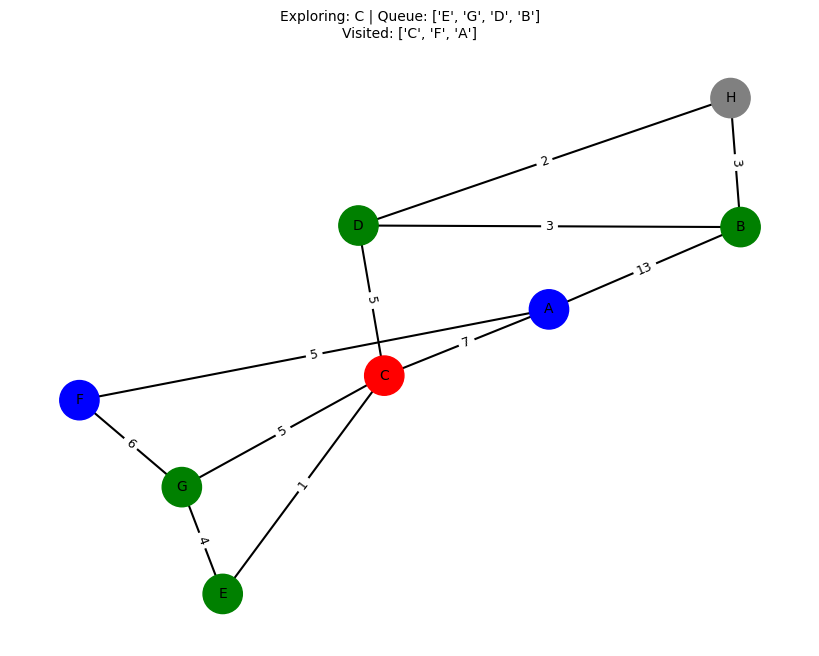

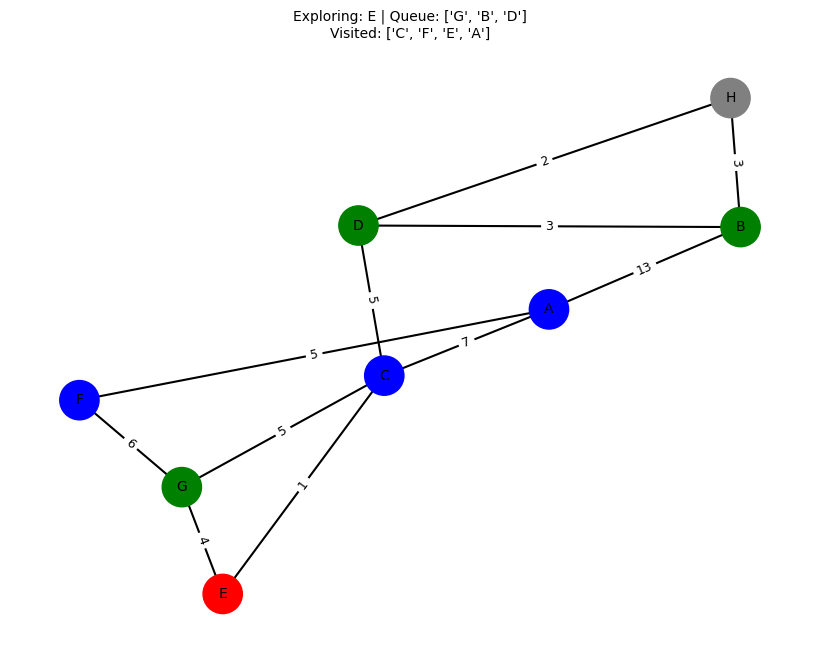

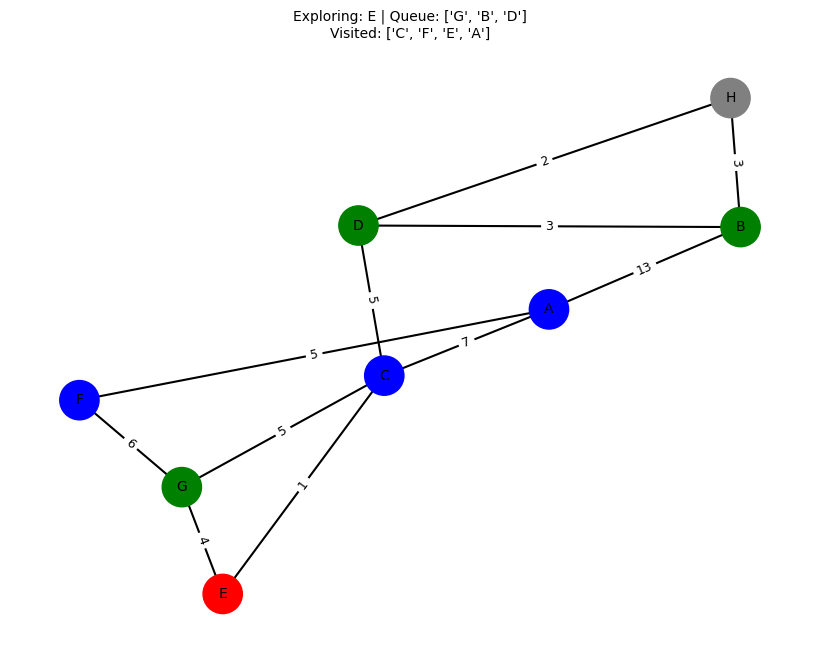

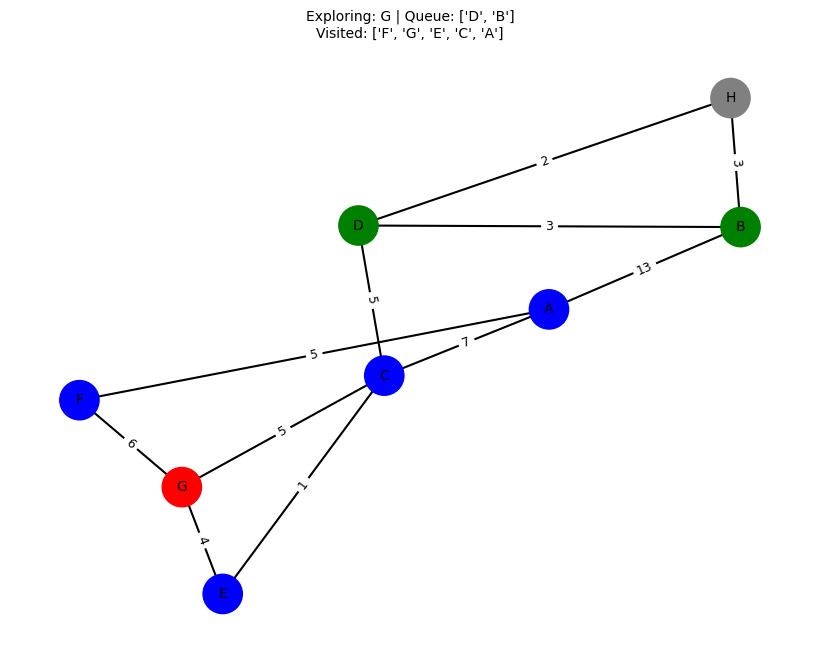

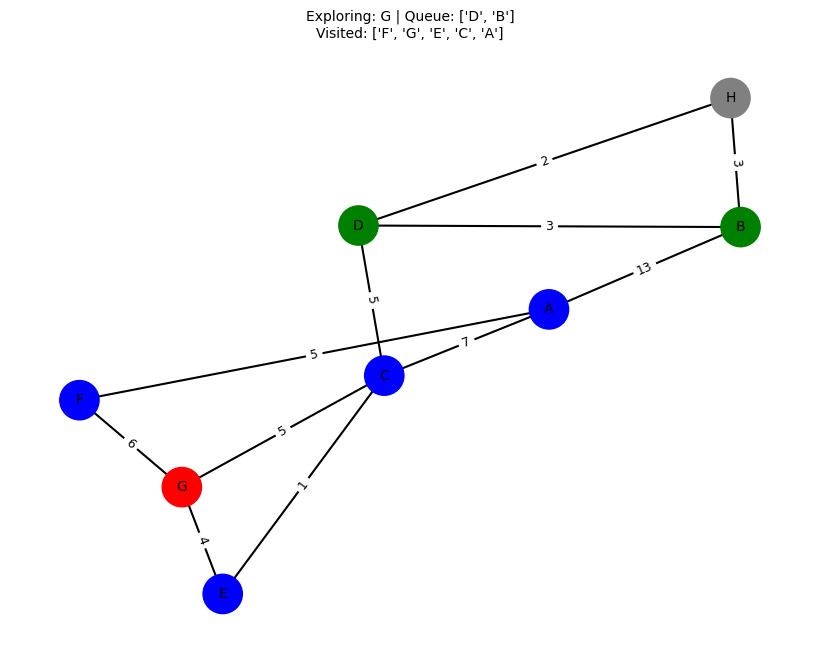

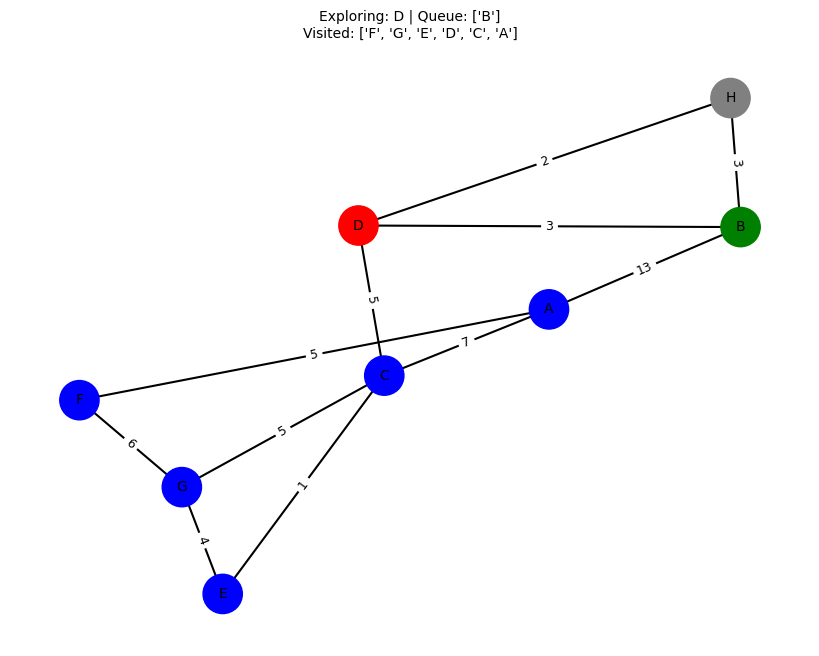

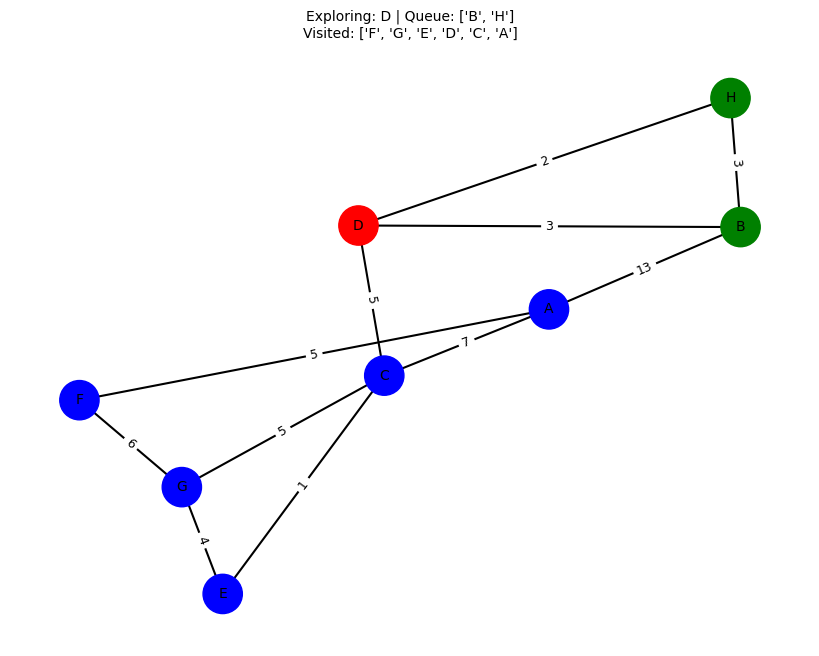

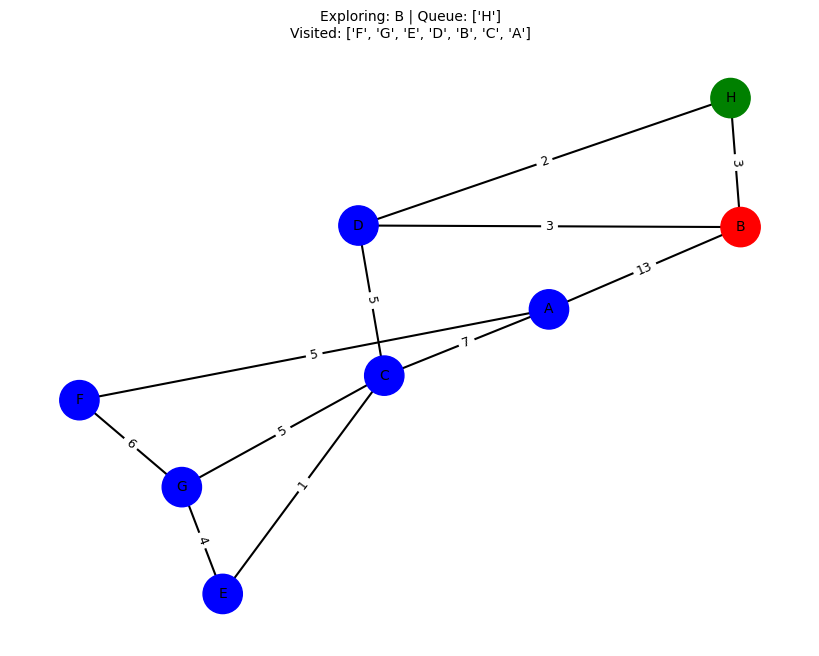

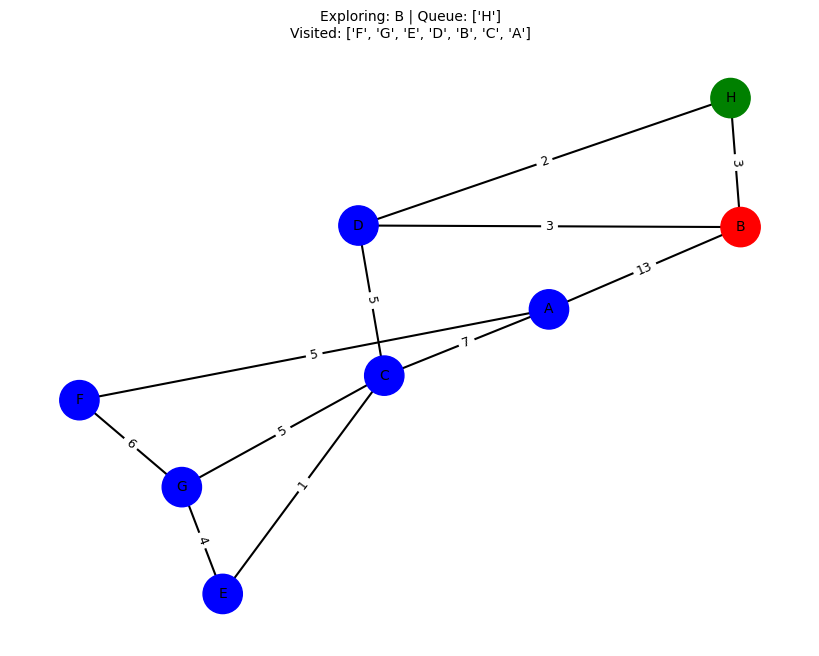

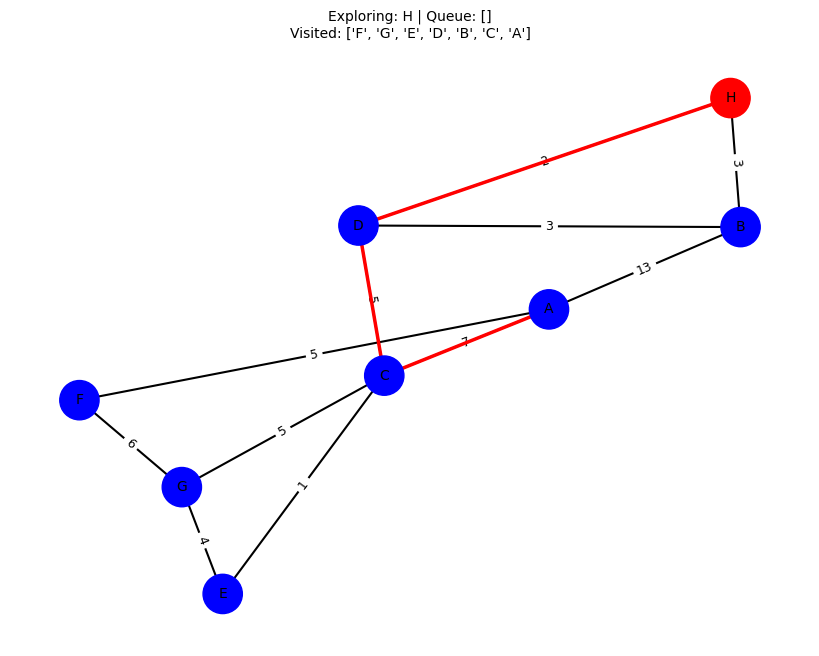


UCS Shortest Path: A → C → D → H
Total Cost: 14


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import time

# Define the graph with weighted edges
graph = {
    'A': [('B', 13), ('C', 7), ('F', 5)],
    'B': [('A', 13), ('H', 3), ('D', 3)],
    'C': [('A', 7), ('D', 5), ('E', 1), ('G', 5)],
    'D': [('B', 3), ('C', 5), ('H', 2)],
    'E': [('C', 1), ('G', 4)],
    'F': [('A', 5), ('G', 6)],
    'G': [('F', 6), ('C', 5), ('E', 4)],
    'H': [('B', 3), ('D', 2)]
}

# Create a directed weighted graph using NetworkX
G = nx.Graph()
for node, neighbors in graph.items():
    for neighbor, cost in neighbors:
        G.add_edge(node, neighbor, weight=cost)

# Function to draw the graph at each UCS step
def draw_graph(G, visited, queue, current, path=None):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42)  # Auto layout for positioning

    # Assign colors to nodes
    node_colors = []
    for node in G.nodes():
        if node == current:
            node_colors.append('red')  # Current node being expanded
        elif node in queue:
            node_colors.append('green')  # Nodes in the priority queue
        elif node in visited:
            node_colors.append('blue')  # Visited nodes
        else:
            node_colors.append('gray')  # Unvisited nodes

    # Draw graph
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=800, edge_color="black", width=1.5, font_size=10)

    # Draw edge labels (weights)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

    # Highlight the final shortest path in red
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=2.5)

    plt.title(f"Exploring: {current} | Queue: {list(queue)}\nVisited: {list(visited)}", fontsize=10)
    plt.show()
    time.sleep(1)  # Pause for better visualization

# UCS function with step-by-step visualization
def uniform_cost_search(graph, start, goal):
    priority_queue = [(0, start)]  # (cost, node)
    visited = set()
    parent = {start: None}  # To reconstruct the path
    cost_so_far = {start: 0}  # Stores the lowest cost to reach each node

    draw_graph(G, visited, [node for _, node in priority_queue], None)  # Initial state

    while priority_queue:
        current_cost, current_node = heapq.heappop(priority_queue)

        # If goal is found, reconstruct the path
        if current_node == goal:
            path = reconstruct_path(parent, goal)
            draw_graph(G, visited, [], current_node, path)  # Highlight final path
            return path, current_cost

        if current_node in visited:
            continue
        visited.add(current_node)

        draw_graph(G, visited, [node for _, node in priority_queue], current_node)  # Draw after dequeuing

        # Expand neighbors
        for neighbor, edge_cost in graph.get(current_node, []):
            new_cost = current_cost + edge_cost

            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                parent[neighbor] = current_node
                heapq.heappush(priority_queue, (new_cost, neighbor))

        draw_graph(G, visited, [node for _, node in priority_queue], current_node)  # Draw after adding neighbors

    return None, float('inf')  # Goal not found

# Reconstruct the path from parent dictionary
def reconstruct_path(parent, goal):
    path = []
    while goal is not None:
        path.append(goal)
        goal = parent[goal]
    return path[::-1]  # Reverse to get correct order

# Define Start and Goal nodes
start_node = "A"
goal_node = "H"

# Run UCS with Visualization
ucs_path, total_cost = uniform_cost_search(graph, start_node, goal_node)

# Print the shortest path result
if ucs_path:
    print("\nUCS Shortest Path:", " → ".join(ucs_path))
    print("Total Cost:", total_cost)
else:
    print("\nGoal not found in the graph.")


#Lab task


UCS Shortest Path: Arad → Sibiu → Rimnicu Vilcea → Pitesti → Bucharest
Total Cost: 418


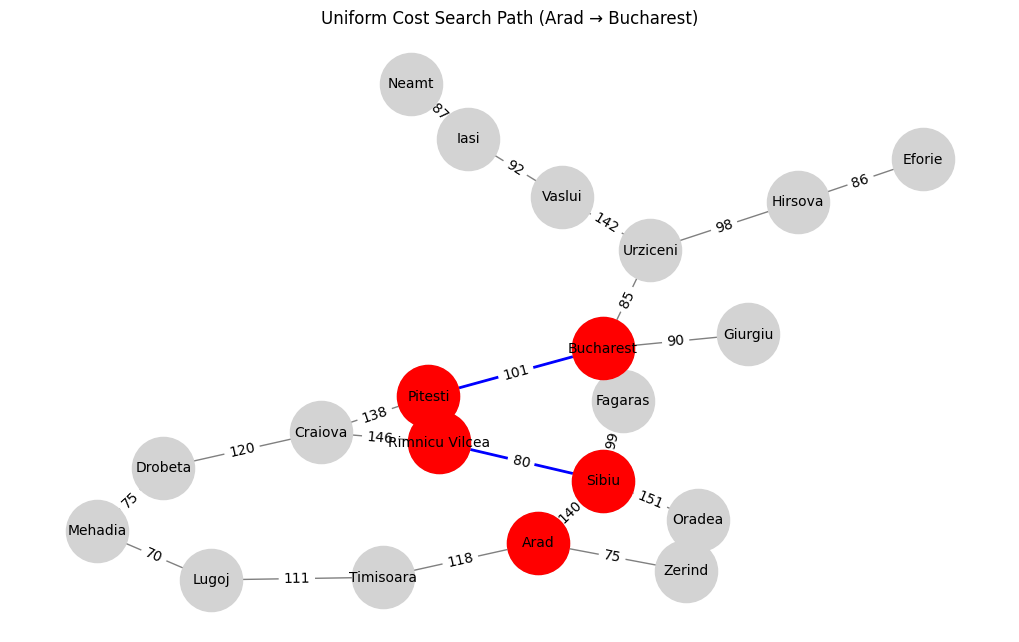

In [3]:
import networkx as nx
import heapq
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Define the Romania map as an edge list with distances
edges = [
    ('Arad', 'Zerind', 75), ('Arad', 'Timisoara', 118), ('Arad', 'Sibiu', 140),
    ('Zerind', 'Oradea', 71), ('Oradea', 'Sibiu', 151),
    ('Timisoara', 'Lugoj', 111), ('Lugoj', 'Mehadia', 70),
    ('Mehadia', 'Drobeta', 75), ('Drobeta', 'Craiova', 120),
    ('Craiova', 'Rimnicu Vilcea', 146), ('Craiova', 'Pitesti', 138),
    ('Sibiu', 'Fagaras', 99), ('Sibiu', 'Rimnicu Vilcea', 80),
    ('Fagaras', 'Bucharest', 211), ('Rimnicu Vilcea', 'Pitesti', 97),
    ('Pitesti', 'Bucharest', 101),
    ('Bucharest', 'Urziceni', 85), ('Bucharest', 'Giurgiu', 90),
    ('Urziceni', 'Vaslui', 142), ('Urziceni', 'Hirsova', 98),
    ('Hirsova', 'Eforie', 86), ('Vaslui', 'Iasi', 92),
    ('Iasi', 'Neamt', 87)
]

# Add edges to the graph
for city1, city2, cost in edges:
    G.add_edge(city1, city2, weight=cost)

# UCS function using NetworkX
def uniform_cost_search(graph, start, goal):
    priority_queue = [(0, start)]  # (cost, node)
    visited = set()
    parent = {start: None}
    cost_so_far = {start: 0}

    while priority_queue:
        current_cost, current_node = heapq.heappop(priority_queue)

        if current_node in visited:
            continue

        visited.add(current_node)

        if current_node == goal:
            return reconstruct_path(parent, goal), current_cost

        for neighbor in graph.neighbors(current_node):
            edge_cost = graph[current_node][neighbor]['weight']
            new_cost = current_cost + edge_cost

            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                parent[neighbor] = current_node
                heapq.heappush(priority_queue, (new_cost, neighbor))

    return None, float('inf')

# Path reconstruction function
def reconstruct_path(parent, goal):
    path = []
    while goal is not None:
        path.append(goal)
        goal = parent[goal]
    return path[::-1]

# Run UCS from Arad to Bucharest
start_node = "Arad"
goal_node = "Bucharest"

ucs_path, total_cost = uniform_cost_search(G, start_node, goal_node)

# Output the result
if ucs_path:
    print("UCS Shortest Path:", " → ".join(ucs_path))
    print("Total Cost:", total_cost)
else:
    print("Goal not found in the graph.")

# Visualization
pos = nx.spring_layout(G)  # Positioning nodes
plt.figure(figsize=(10, 6))

# Draw the full graph
nx.draw(G, pos, with_labels=True, node_color='lightgray', edge_color='gray', node_size=2000, font_size=10)

# Highlight the UCS path
path_edges = list(zip(ucs_path, ucs_path[1:]))
nx.draw_networkx_nodes(G, pos, nodelist=ucs_path, node_color='red', node_size=2000)
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='blue', width=2)

# Show edge labels (distances)
edge_labels = {(city1, city2): cost for city1, city2, cost in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("Uniform Cost Search Path (Arad → Bucharest)")
plt.show()


# Activity 1


In [4]:
import networkx as nx
import heapq

def uniform_cost_search(graph, start, goal):
    # Priority queue for UCS (min-heap)
    frontier = []
    heapq.heappush(frontier, (0, start, []))  # (cost, node, path)
    explored = {}

    while frontier:
        cost, node, path = heapq.heappop(frontier)

        # If already visited with a lower cost, skip
        if node in explored and explored[node] <= cost:
            continue

        # Mark node as visited with the current cost
        explored[node] = cost
        path = path + [node]

        # If goal is reached, return the path
        if node == goal:
            return path

        for neighbor, weight in graph[node].items():
            new_cost = cost + weight['weight']
            heapq.heappush(frontier, (new_cost, neighbor, path))

    return None  # If no path is found

# Creating the graph using NetworkX
G = nx.Graph()

# Adding edges with weights
edges = [
    ('A', 'B', 6), ('A', 'C', 9), ('A', 'E', 1),
    ('B', 'D', 3), ('B', 'E', 4),
    ('C', 'F', 2), ('C', 'G', 3),
    ('D', 'E', 5), ('D', 'F', 7),
    ('E', 'F', 6),
    ('F', 'G', 3)
]

G.add_weighted_edges_from(edges)

# Running UCS from 'C' to 'B'
solution = uniform_cost_search(G, 'C', 'B')
print(solution)  # Should output the correct path: ['C', 'F', 'D', 'B']

['C', 'F', 'D', 'B']
